# Logestic Regression Usimf Imbalance Techniques
### Author: Ehsan Gharib-Nezhad



In [79]:
# # Imbalance data Handling ___________________________________________________

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from myfunctions import *

In [80]:
df = pd.read_csv('../datasets/text_processed_all_posts_combined_imbalanced.csv',index_col=0)

### Set up X and Y

In [81]:
X = df['post']
y = df['is_Covid19positive']

In [82]:
#check baseline:

y.value_counts(normalize = True)

1    0.929286
0    0.070714
Name: is_Covid19positive, dtype: float64

### train test split

In [83]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, random_state = 42)

In [84]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.929273
 0    0.070727
 Name: is_Covid19positive, dtype: float64,
 1    0.929322
 0    0.070678
 Name: is_Covid19positive, dtype: float64)

# ======================================================






## Use count vectorizer

In [85]:
cvec = CountVectorizer()

In [86]:
Xcv_train = cvec.fit_transform(X_train)
Xcv_test  = cvec.transform(X_test)

# ======================================================

## Imbalance Technique1: Oversample Less Frequent Class

Chooses new samples of the minority class at random with replacement.

**RandomOverSampler**:
- Oversample the minority class(es) by randomly picking samples with or without replacement.
- `replacement` can be set to True or False. It is False by default
- can change `sampling_strategy` here too

#### Instantiate and Fit RandomOverSampler

In [87]:
ros = RandomOverSampler()

X_train_over , y_train_over = ros.fit_resample(Xcv_train, y_train)

In [75]:
def print_sampling_stats(Xs_train, X_train_sampled,
                         y_train, y_train_sampled,
                         y_test):
    
    print('Original dataset classes: {}'.format(Counter(y_train)))
    print('Resampled dataset classes: {}'.format(Counter(y_train_sampled)))
    print()
    print('Test dataset classes still the same to model real world: {}'.format(Counter(y_test)))

    print()
    print('X_train shape (under/reg): ', X_train_sampled.shape, Xcv_train.shape)
    print('y_train shape (under/reg): ', y_train_sampled.shape, y_train.shape)
    print('X_test, shape y_test: ', Xcv_test.shape, y_test.shape)

In [76]:
print_sampling_stats(Xcv_train, X_train_over, y_train, y_train_over, y_test)

Original dataset classes: Counter({1: 23072, 0: 1756})
Resampled dataset classes: Counter({1: 23072, 0: 23072})

Test dataset classes still the same to model real world: Counter({1: 7692, 0: 585})

X_train shape (under/reg):  (46144, 29871) (24828, 29871)
y_train shape (under/reg):  (46144,) (24828,)
X_test, shape y_test:  (8277, 29871) (8277,)


## Fit and score Logistic Regression / L2 (Ridge)

In [77]:
logreg_over = LogisticRegression()

logreg_over.fit(X_train_over, y_train_over)

LogisticRegression()

# Confusion Matrix

Score on training set: 0.9953278556468503
Score on testing set: 0.9683460190890419
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       585
           1       0.99      0.98      0.98      7692

    accuracy                           0.97      8277
   macro avg       0.87      0.91      0.89      8277
weighted avg       0.97      0.97      0.97      8277



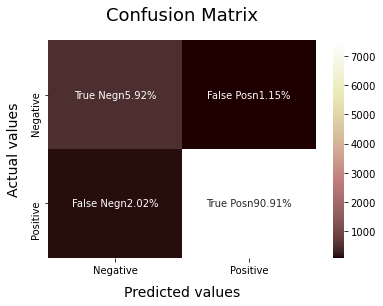

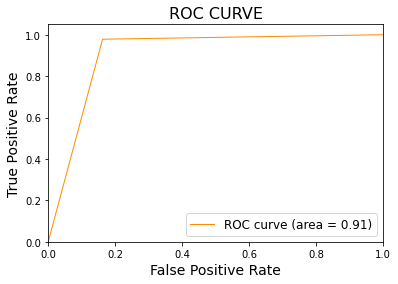

In [78]:
model_Evaluate(logreg_over, Xcv_train, Xcv_test, y_train, y_test)

In [42]:
score1=model_Evaluate_values(logreg_over, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='Logestic  Regression / RandomOverSampler')

In [43]:
score1

(   is_pandemicPreps  is_covid19positive     metric  \
 0              0.90                0.93  precision   
 1              0.92                0.92     recall   
 2              0.91                0.92     fscore   
 3            586.00              740.00    support   
 
                                       model  
 0  Logestic  Regression / RandomOverSampler  
 1  Logestic  Regression / RandomOverSampler  
 2  Logestic  Regression / RandomOverSampler  
 3  Logestic  Regression / RandomOverSampler  ,
    score   metric                                     model
 0   0.99  R_train  Logestic  Regression / RandomOverSampler
 1   0.92   R_test  Logestic  Regression / RandomOverSampler,
    score     metric                                     model
 0   0.41   True Neg  Logestic  Regression / RandomOverSampler
 1   0.04  False Pos  Logestic  Regression / RandomOverSampler
 2   0.05  False Neg  Logestic  Regression / RandomOverSampler
 3   0.51   True Pos  Logestic  Regression / Random

# Imbalance Technique 2: SMOTE (Synthetic Minority Over-sampling Technique)

This technique does not just randomly oversample with replacement. Instead, it uses nearest neighbors to synthetically create fake datapoints to use for oversampling.

**SMOTE Hyperparameters**:

- `sampling_strategy`: minority/majority ratio
- `k_neighbors`: similar to KNN - specifying the number of nearest neighbors to used to construct synthetic samples. Default is 5.

#### Instantiate and fit SMOTE

In [44]:
smote = SMOTE()

X_train_smote , y_train_smote = smote.fit_resample(Xcv_train, y_train)

In [45]:
print_sampling_stats(Xcv_train, X_train_smote, y_train, y_train_smote, y_test)

Original dataset classes: Counter({1: 2220, 0: 1755})
Resampled dataset classes: Counter({0: 2220, 1: 2220})

Test dataset classes still the same to model real world: Counter({1: 740, 0: 586})

X_train shape (under/reg):  (4440, 16953) (3975, 16953)
y_train shape (under/reg):  (4440,) (3975,)
X_test, shape y_test:  (1326, 16953) (1326,)


## Fit & Score Logistic Regression / Regulization = L2 (Ridge)

In [46]:
logreg_smote = LogisticRegression()

logreg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [47]:
logreg_smote.score(X_train_smote, y_train_smote), logreg_smote.score(Xcv_test, y_test)

(0.9862612612612612, 0.9087481146304676)

# Confusion Matrix

Score on training set: 0.9856603773584905
Score on testing set: 0.9087481146304676
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       586
           1       0.94      0.89      0.92       740

    accuracy                           0.91      1326
   macro avg       0.91      0.91      0.91      1326
weighted avg       0.91      0.91      0.91      1326



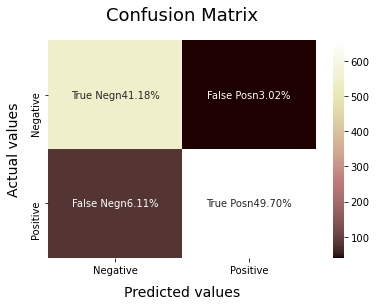

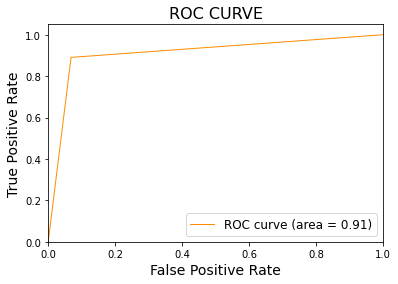

In [48]:
model_Evaluate(logreg_smote, Xcv_train, Xcv_test, y_train, y_test)

In [49]:
score2=model_Evaluate_values(logreg_smote, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='Logestic  Regression / SMOTE')

# ======================================================

# Imbalance Technique 3: Weight each class in the model
Many models (including Random Forests and Logistic Regression, etc) allow you to weight each class. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

In [50]:
# this class_weight='balanced' is very powerful. we can try it in the first place 
# to get an idea how much improvement we can get.
logreg_balanced = LogisticRegression(max_iter = 10000, class_weight = 'balanced')

logreg_balanced.fit(Xcv_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [51]:
logreg_balanced.score(X_train_smote, y_train_smote), logreg_balanced.score(Xcv_test, y_test)

(0.9896396396396396, 0.9177978883861236)

# Confusion Matrix

Score on training set: 0.9937106918238994
Score on testing set: 0.9177978883861236
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       586
           1       0.94      0.91      0.93       740

    accuracy                           0.92      1326
   macro avg       0.92      0.92      0.92      1326
weighted avg       0.92      0.92      0.92      1326



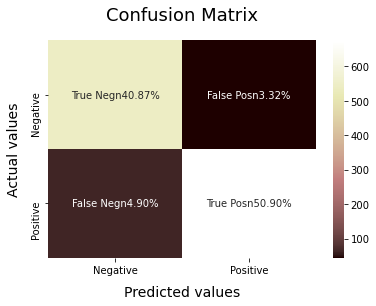

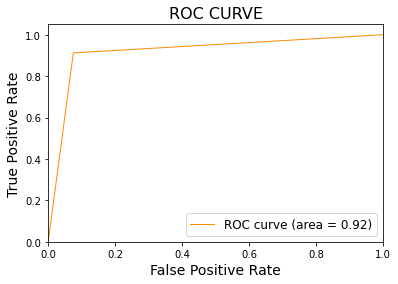

In [52]:
model_Evaluate(logreg_balanced, Xcv_train, Xcv_test, y_train, y_test)

In [54]:
score3=model_Evaluate_values(logreg_smote, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='Logestic  Regression / balanced')

In [55]:
score = [pd.concat([score1[i], score2[i], score3[i]], ignore_index=True) for i in range(3)]

In [65]:
score = [pd.concat([score1[i], score2[i], score3[i]], ignore_index=True) for i in range(3)]

def attach_df_report():
    # accuracy - 1
    df1 = pd.read_csv('../datasets/models_metrics_report_accuracy.csv', index_col=0)
    df2 = score[1]
    pd.concat([df1,df2],ignore_index=True).to_csv('../datasets/models_metrics_report_accuracy.csv')
    # accuracy - 0
    df1 = pd.read_csv('../datasets/models_metrics_report_precision_recall.csv', index_col=0)
    df2 = score[0]
    pd.concat([df1,df2],ignore_index=True).to_csv('../datasets/models_metrics_report_precision_recall.csv')
    # accuracy - 2
    df1 = pd.read_csv('../datasets/models_metrics_report_confusionMatrix.csv', index_col=0)
    df2 = score[2]
    pd.concat([df1,df2],ignore_index=True).to_csv('../datasets/models_metrics_report_confusionMatrix.csv')
    
attach_df_report()    
# pd.DataFrame(score[2]).to_csv('../datasets/models_metrics_report_confusionMatrix.csv')

# pd.DataFrame(score).to_csv('../datasets/models_metrics_report_precision_recall.csv')

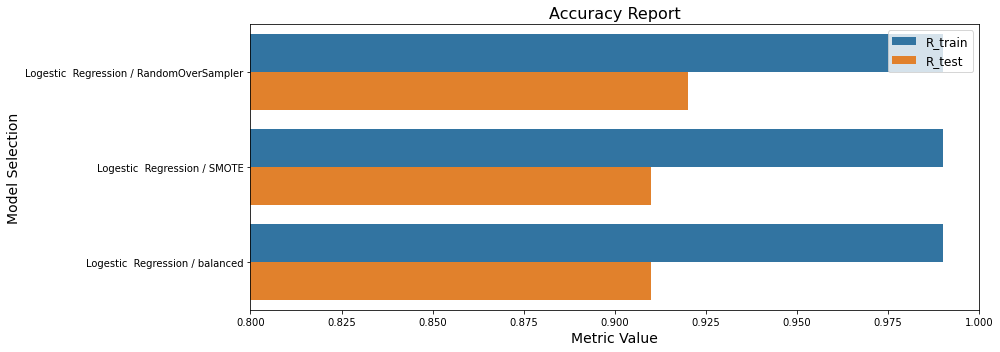

In [56]:
plt.figure(figsize=(14,5))
plt.title('Accuracy Report', fontsize = 16)

sns.barplot(x='score', y='model', hue='metric', data=score[1])

plt.xlim((0.8,1))
plt.xlabel('Metric Value', fontsize = 14)
plt.ylabel('Model Selection', fontsize = 14)
plt.legend(fontsize = 12)
plt.tight_layout();



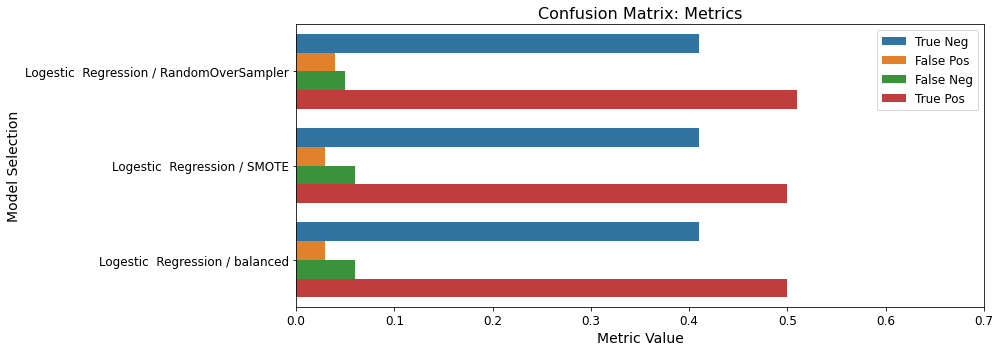

In [57]:
plt.figure(figsize=(14,5))
sns.barplot(x='score', y='model', hue='metric', data=score[2])

plt.title('Confusion Matrix: Metrics', fontsize = 16)
plt.xlabel('Metric Value', fontsize = 14)
plt.ylabel('Model Selection', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.xlim((0.0,0.7))
plt.tight_layout();

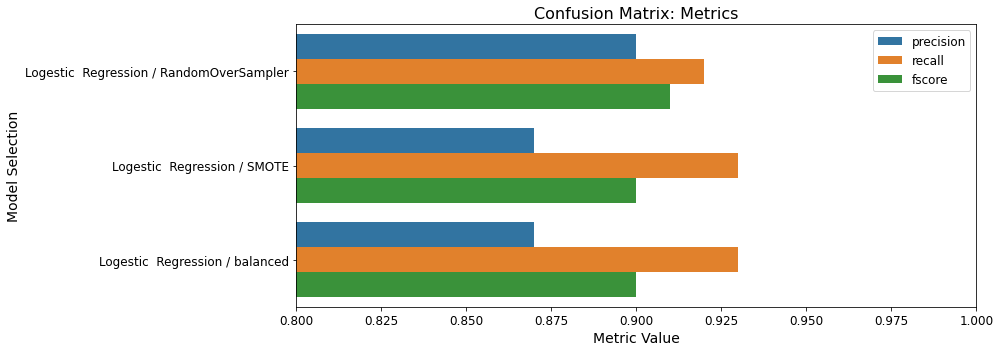

In [58]:
plt.figure(figsize=(14,5))
# sns.barplot(x='is_pandemicPreps', y='model', hue='score', data=score[0][score[0]['score'] != 'support'])
sns.barplot(x='is_pandemicPreps', y='model', hue='metric', data=score[0][score[0]['metric'] != 'support'])

# sns.barplot(x='is_covid19positive', y='model', hue='score', data=score[0][score[0]['score'] != 'support'])

plt.xlim((0.8,1))
plt.title('Confusion Matrix: Metrics', fontsize = 16)
plt.xlabel('Metric Value', fontsize = 14)
plt.ylabel('Model Selection', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.tight_layout();